# Aramco Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv("2222.SR.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,29.090908,29.090908,29.090908,29.090908,25.618721,38289394
1,2019-12-12,31.983471,31.983471,29.752066,30.413223,26.783213,505692621
2,2019-12-15,30.661158,30.991735,30.413223,30.909090,27.219894,98349281
3,2019-12-16,30.991735,31.487602,30.991735,31.404959,27.656578,105973907
4,2019-12-17,31.446280,31.528925,30.991735,31.198347,27.474625,142672245


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1045 non-null   object 
 1   Open       1045 non-null   float64
 2   High       1045 non-null   float64
 3   Low        1045 non-null   float64
 4   Close      1045 non-null   float64
 5   Adj Close  1045 non-null   float64
 6   Volume     1045 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1.045000e+03
mean,30.600125,30.790170,30.410650,30.610592,28.913441,9.317468e+06
std,2.863249,2.895032,2.806567,2.846445,3.523640,1.867842e+07
min,22.314049,23.388430,22.314049,22.975206,20.232971,0.000000e+00
25%,28.842976,28.954544,28.760330,28.884296,26.648006,3.686392e+06
50%,29.590908,29.752066,29.500000,29.636362,28.271555,5.981893e+06
75%,32.818180,33.045452,32.636364,32.727272,32.081791,1.096756e+07
max,38.636364,39.409088,38.363636,38.636364,36.601822,5.056926e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter rows where 'Date' is after 2020
df2 = df[df['Date'] > '2020-01-01']

# Plotting the area chart
px.area(df2, x="Date", y="Volume")

In [ ]:
px.bar(df2, y='Volume')

In [ ]:
px.box(df,y="Close")

# Understanding Facebook Prophet

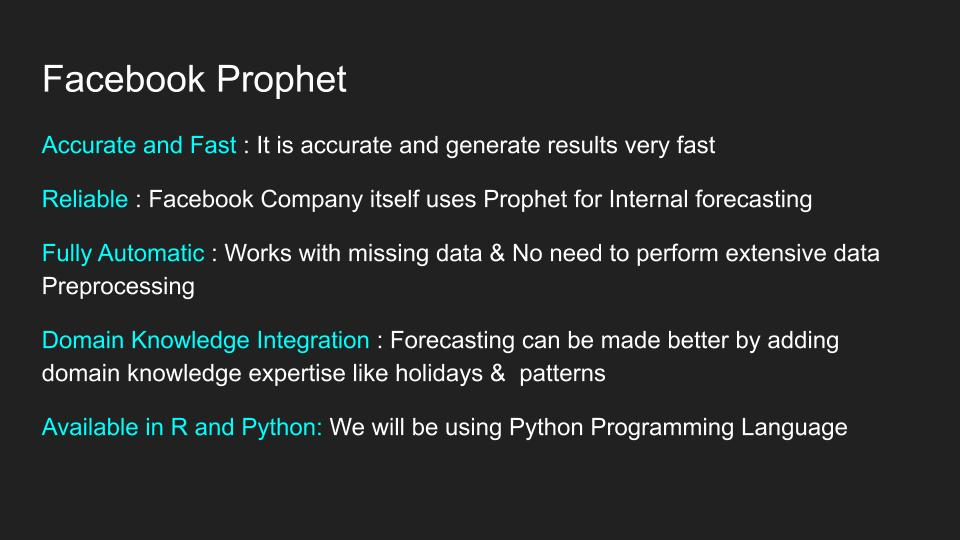

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,29.090908,29.090908,29.090908,29.090908,25.618721,38289394
1,2019-12-12,31.983471,31.983471,29.752066,30.413223,26.783213,505692621
2,2019-12-15,30.661158,30.991735,30.413223,30.909090,27.219894,98349281
3,2019-12-16,30.991735,31.487602,30.991735,31.404959,27.656578,105973907
4,2019-12-17,31.446280,31.528925,30.991735,31.198347,27.474625,142672245
...,...,...,...,...,...,...,...
1040,2024-02-07,31.299999,31.299999,30.900000,31.049999,31.049999,11743893
1041,2024-02-08,31.299999,31.299999,30.900000,31.049999,31.049999,11743893
1042,2024-02-11,30.700001,30.900000,30.350000,30.450001,30.450001,12831893
1043,2024-02-12,30.450001,31.000000,30.350000,30.900000,30.900000,12173609


In [ ]:
  columns=['Date',"Close"]
  ndf=pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2019-12-11,29.090908
1,2019-12-12,30.413223
2,2019-12-15,30.909090
3,2019-12-16,31.404959
4,2019-12-17,31.198347
...,...,...
1040,2024-02-07,31.049999
1041,2024-02-08,31.049999
1042,2024-02-11,30.450001
1043,2024-02-12,30.900000


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2019-12-11,29.090908
1,2019-12-12,30.413223
2,2019-12-15,30.909090
3,2019-12-16,31.404959
4,2019-12-17,31.198347
...,...,...
1040,2024-02-07,31.049999
1041,2024-02-08,31.049999
1042,2024-02-11,30.450001
1043,2024-02-12,30.900000


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbru1710/cs9udrv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbru1710/nzxa4lsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41023', 'data', 'file=/tmp/tmpvbru1710/cs9udrv7.json', 'init=/tmp/tmpvbru1710/nzxa4lsu.json', 'output', 'file=/tmp/tmpvbru1710/prophet_model6e3hufgg/prophet_model-20240215081529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-11,31.270612,29.822135,31.704219,31.270612,31.270612,-0.511234,-0.511234,-0.511234,0.473920,0.473920,0.473920,-0.985154,-0.985154,-0.985154,0.0,0.0,0.0,30.759377
1,2019-12-12,31.218634,29.757608,31.627277,31.218634,31.218634,-0.535452,-0.535452,-0.535452,0.489590,0.489590,0.489590,-1.025042,-1.025042,-1.025042,0.0,0.0,0.0,30.683182
2,2019-12-15,31.062701,29.416782,31.338098,31.062701,31.062701,-0.694675,-0.694675,-0.694675,0.440837,0.440837,0.440837,-1.135512,-1.135512,-1.135512,0.0,0.0,0.0,30.368026
3,2019-12-16,31.010723,29.403790,31.184026,31.010723,31.010723,-0.736632,-0.736632,-0.736632,0.432674,0.432674,0.432674,-1.169307,-1.169307,-1.169307,0.0,0.0,0.0,30.274091
4,2019-12-17,30.958746,29.335592,31.240867,30.958746,30.958746,-0.700237,-0.700237,-0.700237,0.501306,0.501306,0.501306,-1.201543,-1.201543,-1.201543,0.0,0.0,0.0,30.258508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2024-03-10,33.806352,32.173429,34.110254,33.726142,33.870032,-0.641835,-0.641835,-0.641835,0.440837,0.440837,0.440837,-1.082672,-1.082672,-1.082672,0.0,0.0,0.0,33.164517
1071,2024-03-11,33.815728,32.103902,34.103099,33.724033,33.885222,-0.701808,-0.701808,-0.701808,0.432674,0.432674,0.432674,-1.134482,-1.134482,-1.134482,0.0,0.0,0.0,33.113920
1072,2024-03-12,33.825104,32.171376,34.024518,33.721378,33.900934,-0.684107,-0.684107,-0.684107,0.501306,0.501306,0.501306,-1.185412,-1.185412,-1.185412,0.0,0.0,0.0,33.140998
1073,2024-03-13,33.834481,32.103780,34.012617,33.723750,33.920030,-0.760292,-0.760292,-0.760292,0.473920,0.473920,0.473920,-1.234211,-1.234211,-1.234211,0.0,0.0,0.0,33.074189


In [ ]:
# Assuming forecast is your DataFrame
print(forecast.tail(30))


             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1045 2024-02-14  33.571943   31.540703   33.454822    33.571943    33.571943   
1046 2024-02-15  33.581319   31.717629   33.550837    33.581319    33.581319   
1047 2024-02-16  33.590696   30.067745   31.947695    33.590696    33.590696   
1048 2024-02-17  33.600072   30.154117   31.976744    33.600072    33.600072   
1049 2024-02-18  33.609448   31.773179   33.631847    33.609448    33.609448   
1050 2024-02-19  33.618825   31.846168   33.790341    33.618825    33.618825   
1051 2024-02-20  33.628201   32.001378   33.929539    33.628201    33.628201   
1052 2024-02-21  33.637577   32.092836   33.986414    33.637577    33.637577   
1053 2024-02-22  33.646954   32.192948   34.050624    33.646954    33.646954   
1054 2024-02-23  33.656330   30.607039   32.492000    33.656330    33.656330   
1055 2024-02-24  33.665706   30.691836   32.557110    33.665706    33.665706   
1056 2024-02-25  33.675083   32.255975  

In [ ]:
px.line(forecast,x='ds',y='yhat')

##Downloading the Forecast data

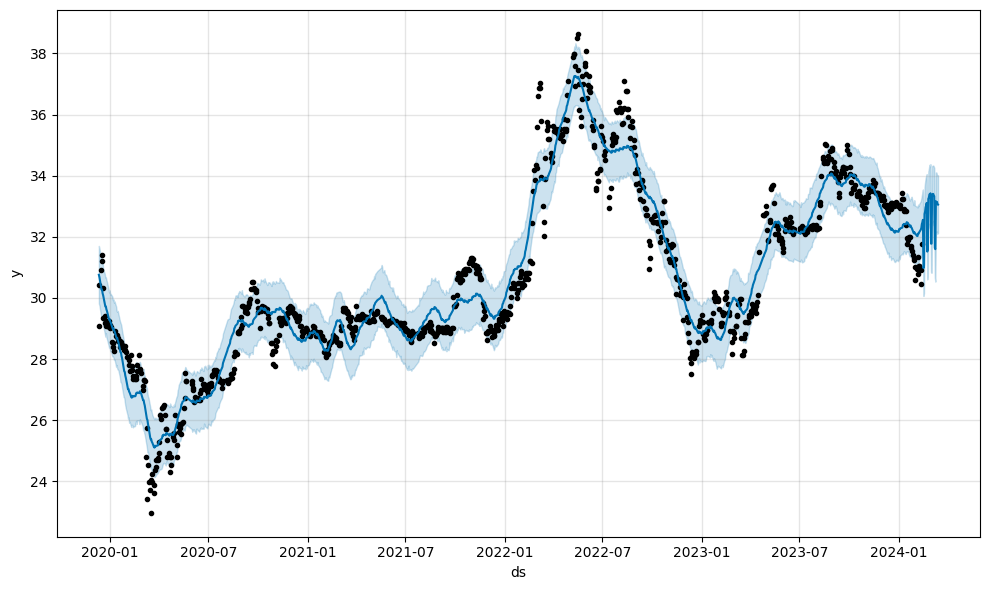

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel="y")

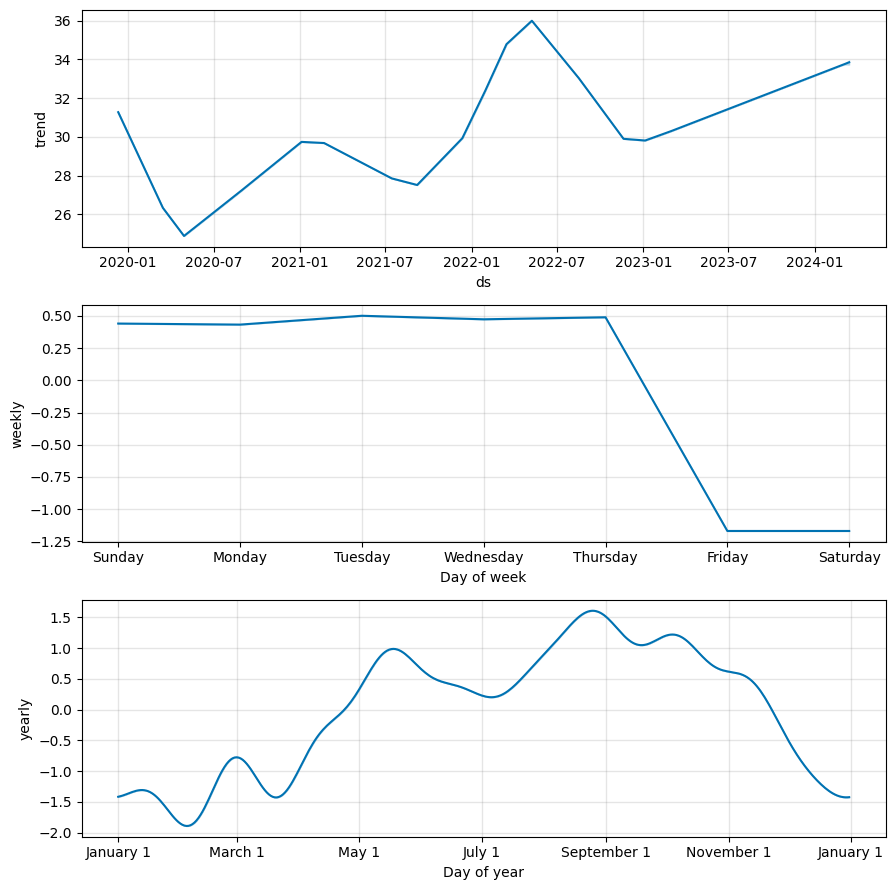

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>